In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets

import matplotlib.pyplot as plt

import keras
import cv2
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model

In [2]:
import cv2
from sklearn.metrics import accuracy_score

In [3]:
(X_train,y_train),(X_test, y_test)=datasets.fashion_mnist.load_data()

In [4]:
print('X training shape: ', X_train.shape)
print('Y training shape: ', y_train.shape)
print('X testing shape: ', X_test.shape)
print('Y testing shape: ', y_test.shape)

X training shape:  (60000, 28, 28)
Y training shape:  (60000,)
X testing shape:  (10000, 28, 28)
Y testing shape:  (10000,)


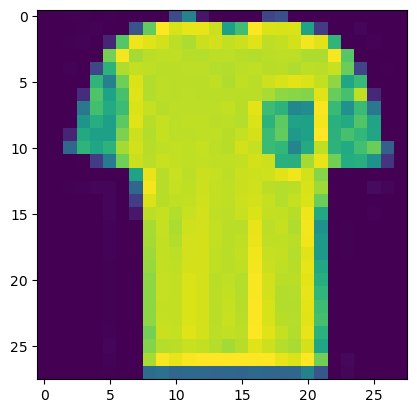

0


In [5]:
plt.imshow(X_train[3340])
plt.show()
print(y_train[3340])

In [6]:
labels=['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

fig,axes = plt.subplots(ncols =7, nrows=3, figsize=(17,8))

index=0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index],cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index+=1
plt.show()

In [8]:
print('X Training shape: ', X_train.shape)
print('X Test shape: ', X_test.shape)

X Training shape:  (60000, 28, 28)
X Test shape:  (10000, 28, 28)


In [9]:
print(y_train[10])

0


In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
X_train=X_train.astype("float32")/255
X_test=X_test.astype("float32")/255

In [12]:
#One hot encoding
y_train =keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test, 10)

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train = np.expand_dims(X_train, -1)
X_test=np.expand_dims(X_test, -1)
print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)

X train shape: (60000, 28, 28, 1)
X test shape: (10000, 28, 28, 1)


In [15]:
print('Y train shape:', y_train.shape)
print('Y test shape:', y_test.shape)

Y train shape: (60000, 10)
Y test shape: (10000, 10)


y_train = np.asarray(y_train.astype('float32').reshape((-1,1)))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [16]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Conv2D(64,(3,3), padding='same', input_shape=(28,28,1), activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#Adding the dropout function to reduce overfitting
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Conv2D(32,(3,3), padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Conv2D(10,(3,3), padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(32,activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

# Using RMS Prop

In [18]:
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics='accuracy')

In [19]:
r = model1.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/5
469/469 [==============================] - 46s 96ms/step - loss: 0.9458 - accuracy: 0.6453 - val_loss: 0.5680 - val_accuracy: 0.7943
Epoch 2/5
469/469 [==============================] - 42s 90ms/step - loss: 0.6004 - accuracy: 0.7770 - val_loss: 0.4918 - val_accuracy: 0.8125
Epoch 3/5
469/469 [==============================] - 42s 90ms/step - loss: 0.5354 - accuracy: 0.8045 - val_loss: 0.4424 - val_accuracy: 0.8413
Epoch 4/5
469/469 [==============================] - 43s 92ms/step - loss: 0.4921 - accuracy: 0.8205 - val_loss: 0.4028 - val_accuracy: 0.8543
Epoch 5/5
469/469 [==============================] - 43s 91ms/step - loss: 0.4634 - accuracy: 0.8318 - val_loss: 0.3819 - val_accuracy: 0.8621


In [20]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [21]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(10000, 10)


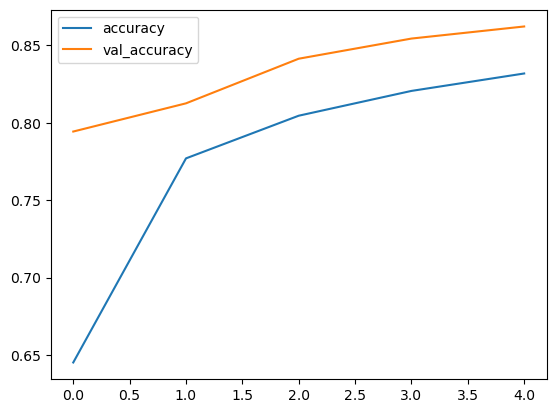

In [22]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

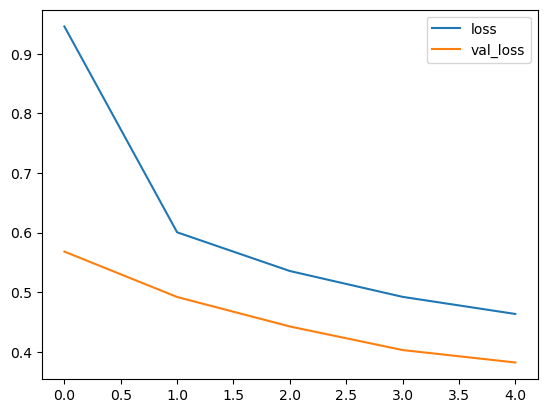

In [23]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()
plt.show()

In [24]:
Y_pred = model1.predict(X_test)
Y_pred_classes=np.argmax(Y_pred, axis=1)
Y_true=np.argmax(y_test, axis=1)
confusion_mtx=tf.math.confusion_matrix(Y_true,Y_pred_classes)

313/313 [==============================] - 2s 6ms/step


In [25]:
print(confusion_mtx)

tf.Tensor(
[[798   1  35  75   7   2  71   0  11   0]
 [  0 976   0  18   2   0   1   0   3   0]
 [  8   2 858  15  80   0  36   0   1   0]
 [ 15  13  15 904  33   0  19   0   1   0]
 [  1   3 123  51 773   0  49   0   0   0]
 [  0   0   0   2   0 960   0  21   1  16]
 [148   4 137  60 132   0 499   0  20   0]
 [  0   0   0   0   0  10   0 905   1  84]
 [  0   1   9   4   6   4   5   1 967   3]
 [  0   0   0   0   0   3   0  15   1 981]], shape=(10, 10), dtype=int32)


<AxesSubplot:>

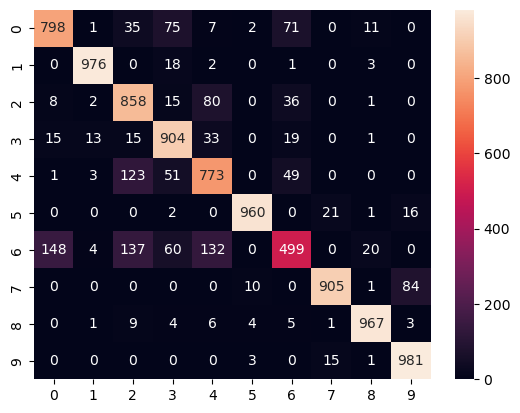

In [26]:
import seaborn as sns
sns.heatmap(confusion_mtx, annot=True, fmt='g')

# Using Adam

In [43]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64,(3,3), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#Adding the dropout function to reduce overfitting
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(10,(3,3), padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [47]:
r2 = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/5
469/469 [==============================] - 45s 94ms/step - loss: 0.9992 - accuracy: 0.6302 - val_loss: 0.5582 - val_accuracy: 0.7930
Epoch 2/5
469/469 [==============================] - 44s 94ms/step - loss: 0.5993 - accuracy: 0.7766 - val_loss: 0.4697 - val_accuracy: 0.8280
Epoch 3/5
469/469 [==============================] - 44s 93ms/step - loss: 0.5289 - accuracy: 0.8053 - val_loss: 0.4321 - val_accuracy: 0.8459
Epoch 4/5
469/469 [==============================] - 42s 90ms/step - loss: 0.4892 - accuracy: 0.8206 - val_loss: 0.3945 - val_accuracy: 0.8558
Epoch 5/5
469/469 [==============================] - 42s 90ms/step - loss: 0.4617 - accuracy: 0.8302 - val_loss: 0.3756 - val_accuracy: 0.8622


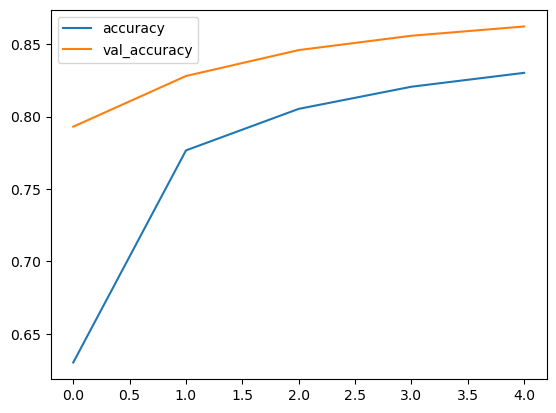

In [48]:
plt.plot(r2.history['accuracy'], label = 'accuracy')
plt.plot(r2.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

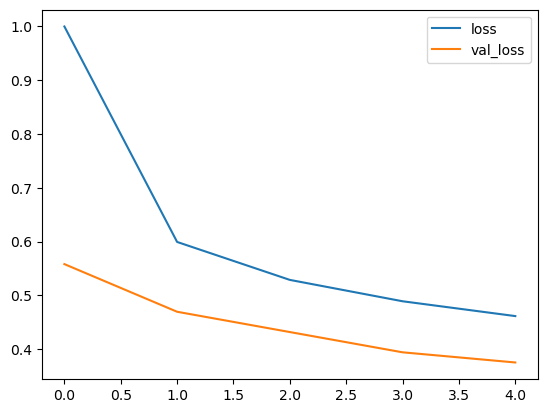

In [49]:
plt.plot(r2.history['loss'], label = 'loss')
plt.plot(r2.history['val_loss'], label ='val_loss')
plt.legend()
plt.show()

# Using Nadam

In [50]:
model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.Conv2D(64,(3,3), padding='same', input_shape=(28,28,1), activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Dropout(0.3))

model2.add(tf.keras.layers.Conv2D(32,(3,3), padding='same',activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Dropout(0.3))

model2.add(tf.keras.layers.Conv2D(10,(3,3), padding='same',activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Dropout(0.3))

model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(32,activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [51]:
model2.compile(loss='categorical_crossentropy', optimizer='nadam', metrics='accuracy')

In [52]:
r3 = model2.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/5
469/469 [==============================] - 45s 93ms/step - loss: 0.9689 - accuracy: 0.6423 - val_loss: 0.5583 - val_accuracy: 0.7953
Epoch 2/5
469/469 [==============================] - 43s 91ms/step - loss: 0.5905 - accuracy: 0.7807 - val_loss: 0.4758 - val_accuracy: 0.8257
Epoch 3/5
469/469 [==============================] - 44s 93ms/step - loss: 0.5193 - accuracy: 0.8097 - val_loss: 0.4210 - val_accuracy: 0.8472
Epoch 4/5
469/469 [==============================] - 43s 93ms/step - loss: 0.4808 - accuracy: 0.8239 - val_loss: 0.4024 - val_accuracy: 0.8493
Epoch 5/5
469/469 [==============================] - 44s 93ms/step - loss: 0.4570 - accuracy: 0.8322 - val_loss: 0.3801 - val_accuracy: 0.8633


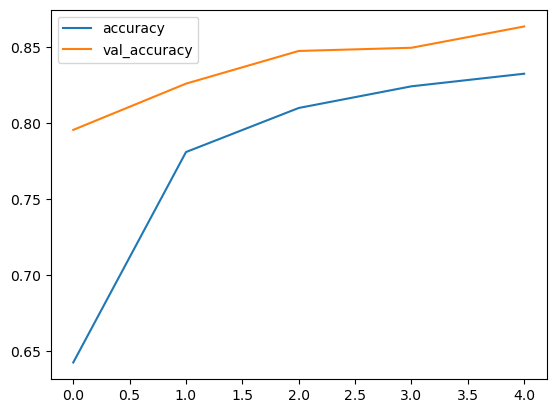

In [53]:
plt.plot(r3.history['accuracy'], label = 'accuracy')
plt.plot(r3.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

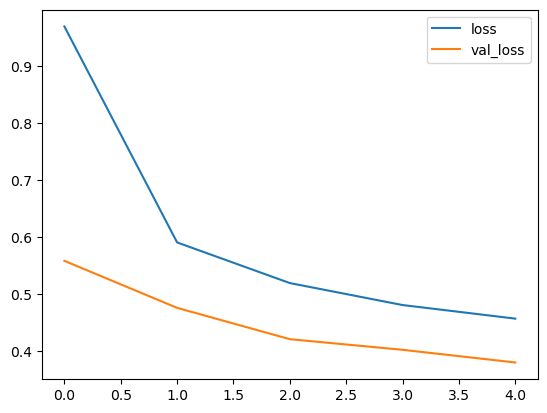

In [54]:
plt.plot(r3.history['loss'], label = 'loss')
plt.plot(r3.history['val_loss'], label ='val_loss')
plt.legend()
plt.show()

# Using Adagrad

In [55]:
model3 = tf.keras.models.Sequential()

model3.add(tf.keras.layers.Conv2D(64,(3,3), padding='same', input_shape=(28,28,1), activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Conv2D(32,(3,3), padding='same',activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Conv2D(10,(3,3), padding='same',activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Flatten())

model3.add(tf.keras.layers.Dense(32,activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [56]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 7, 7, 32)         

In [57]:
model3.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics='accuracy')

In [58]:
r4 = model3.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/5
469/469 [==============================] - 46s 97ms/step - loss: 2.3023 - accuracy: 0.1072 - val_loss: 2.2924 - val_accuracy: 0.1725
Epoch 2/5
469/469 [==============================] - 44s 93ms/step - loss: 2.2862 - accuracy: 0.1178 - val_loss: 2.2798 - val_accuracy: 0.1790
Epoch 3/5
469/469 [==============================] - 43s 92ms/step - loss: 2.2664 - accuracy: 0.1284 - val_loss: 2.2528 - val_accuracy: 0.1921
Epoch 4/5
469/469 [==============================] - 44s 94ms/step - loss: 2.2332 - accuracy: 0.1336 - val_loss: 2.2028 - val_accuracy: 0.2208
Epoch 5/5
469/469 [==============================] - 44s 93ms/step - loss: 2.1779 - accuracy: 0.1506 - val_loss: 2.1212 - val_accuracy: 0.2474


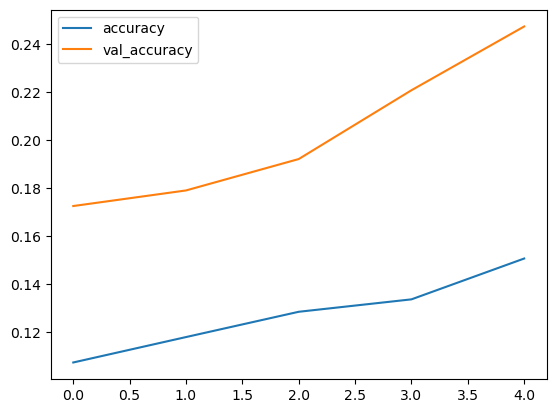

In [59]:
plt.plot(r4.history['accuracy'], label = 'accuracy')
plt.plot(r4.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

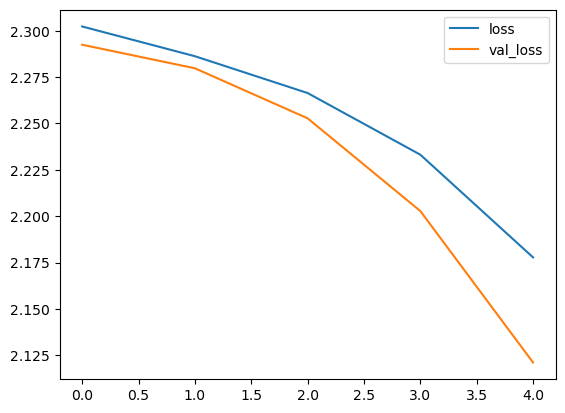

In [60]:
plt.plot(r4.history['loss'], label = 'loss')
plt.plot(r4.history['val_loss'], label ='val_loss')
plt.legend()
plt.show()

# Comparing the functions

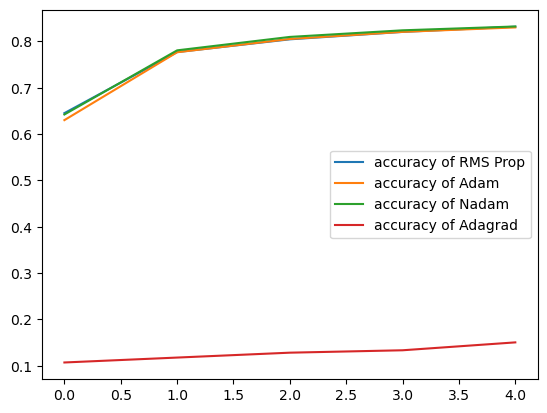

In [61]:
plt.plot(r.history['accuracy'], label = 'accuracy of RMS Prop')
plt.plot(r2.history['accuracy'], label = 'accuracy of Adam')
plt.plot(r3.history['accuracy'], label = 'accuracy of Nadam')
plt.plot(r4.history['accuracy'], label = 'accuracy of Adagrad')

plt.legend()
plt.show()

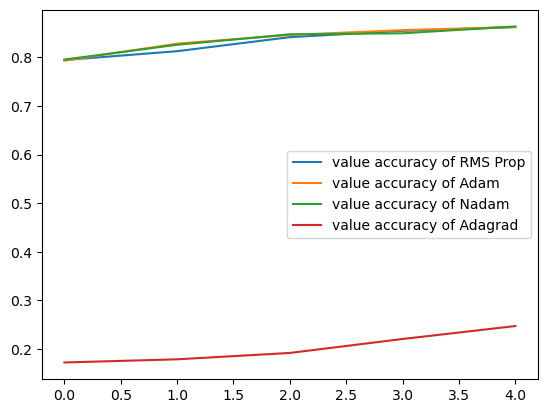

In [62]:
plt.plot(r.history['val_accuracy'], label = 'value accuracy of RMS Prop')
plt.plot(r2.history['val_accuracy'], label = 'value accuracy of Adam')
plt.plot(r3.history['val_accuracy'], label = 'value accuracy of Nadam')
plt.plot(r4.history['val_accuracy'], label = 'value accuracy of Adagrad')

plt.legend()
plt.show()

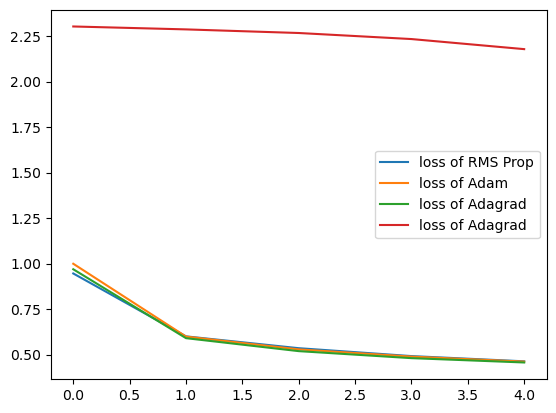

In [63]:
plt.plot(r.history['loss'], label = 'loss of RMS Prop')
plt.plot(r2.history['loss'], label = 'loss of Adam')
plt.plot(r3.history['loss'], label = 'loss of Nadam')
plt.plot(r4.history['loss'], label = 'loss of Adagrad')

plt.legend()
plt.show()

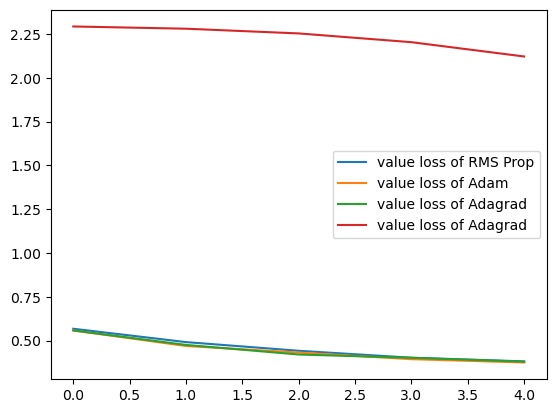

In [64]:
plt.plot(r.history['val_loss'], label = 'value loss of RMS Prop')
plt.plot(r2.history['val_loss'], label = 'value loss of Adam')
plt.plot(r3.history['val_loss'], label = 'value loss of Nadam')
plt.plot(r4.history['val_loss'], label = 'value loss of Adagrad')

plt.legend()
plt.show()

# Conclusion

The same model with different names was created to accurately classifly the opitmization accuracy of various optimizers namely RMS Prop, Adam, Nadam and Adagrad.

The final accuracy was as follows:
1. RMS Prop: 0.8621
2. Adam: 0.8622
3. Nadam: 0.8633
4. Adagrad: 0.2474

We have hence come to the conclusion that Nadam optimizer provides the best accuracy. 
On the contary the Adagrad optimizer provides the worst accuracy. 